### The dataset contains 36733 instances of 11 sensor measures aggregated over one hour (by means of average or sum) from a gas turbine. 
### The Dataset includes gas turbine parameters (such as Turbine Inlet Temperature and Compressor Discharge pressure) in addition to the ambient variables.


In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split,cross_val_score
import warnings
warnings.filterwarnings('ignore')

In [81]:
gt_data=pd.read_csv('/content/gas_turbines.csv')
gt_data
   

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


## Data Exploration

In [82]:
gt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [83]:
gt_data.describe().T

,count,mean,std,min,25%,50%,75%,max
AT,15039.0,17.764381,7.574323,0.522300,11.408000,18.1860,23.8625,34.9290
AP,15039.0,1013.199240,6.410760,985.850000,1008.900000,1012.8000,1016.9000,1034.2000
AH,15039.0,79.124174,13.793439,30.344000,69.750000,82.2660,90.0435,100.2000
AFDP,15039.0,4.200294,0.760197,2.087400,3.723900,4.1862,4.5509,7.6106
GTEP,15039.0,25.419061,4.173916,17.878000,23.294000,25.0820,27.1840,37.4020
TIT,15039.0,1083.798770,16.527806,1000.800000,1079.600000,1088.7000,1096.0000,1100.8000
TAT,15039.0,545.396183,7.866803,512.450000,542.170000,549.8900,550.0600,550.6100
TEY,15039.0,134.188464,15.829717,100.170000,127.985000,133.7800,140.8950,174.6100
CDP,15039.0,12.102353,1.103196,9.904400,11.622000,12.0250,12.5780,15.0810
CO,15039.0,1.972499,2.222206,0.000388,0.858055,1.3902,2.1604,44.1030


As we show that mean of TIT is heigh as compare to CO it means data are not in same scale so we need to standardize the data

In [84]:
# checking for nll values 
gt_data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [85]:
# checking for duplicate values
gt_data[gt_data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [86]:
#Unique values for every feature
gt_data.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

There is no null values, no duplicate values and all datatypes are correctly identify 

In [87]:
numerical_features = gt_data.describe(include=["int64","float64"]).columns
numerical_features

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

## Exploratory Data Analysis

In [88]:
# correlation between numeric data
gt_data.corr()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
AT,1.000000,-0.412953,-0.549432,-0.099333,-0.049103,0.093067,0.338569,-0.207495,-0.100705,-0.088588,-0.600006
AP,-0.412953,1.000000,0.042573,0.040318,0.078575,0.029650,-0.223479,0.146939,0.131198,0.041614,0.256744
AH,-0.549432,0.042573,1.000000,-0.119249,-0.202784,-0.247781,0.010859,-0.110272,-0.182010,0.165505,0.143061
AFDP,-0.099333,0.040318,-0.119249,1.000000,0.744251,0.627254,-0.571541,0.717995,0.727152,-0.334207,-0.037299
GTEP,-0.049103,0.078575,-0.202784,0.744251,1.000000,0.874526,-0.756884,0.977042,0.993784,-0.508259,-0.208496
TIT,0.093067,0.029650,-0.247781,0.627254,0.874526,1.000000,-0.357320,0.891587,0.887238,-0.688272,-0.231636
TAT,0.338569,-0.223479,0.010859,-0.571541,-0.756884,-0.357320,1.000000,-0.720356,-0.744740,0.063404,0.009888
TEY,-0.207495,0.146939,-0.110272,0.717995,0.977042,0.891587,-0.720356,1.000000,0.988473,-0.541751,-0.102631
CDP,-0.100705,0.131198,-0.182010,0.727152,0.993784,0.887238,-0.744740,0.988473,1.000000,-0.520783,-0.169103
CO,-0.088588,0.041614,0.165505,-0.334207,-0.508259,-0.688272,0.063404,-0.541751,-0.520783,1.000000,0.316743


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text major ticklabel objects>)

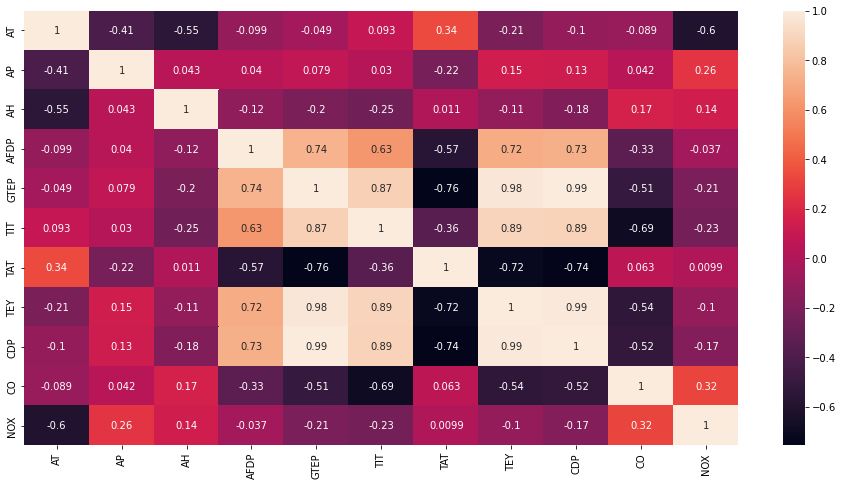

In [89]:
# Heatmap for numerical values for correlation
fig=plt.figure(figsize=(16,8))
sns.heatmap(gt_data.corr(),annot=True);
plt.xticks(rotation=90)

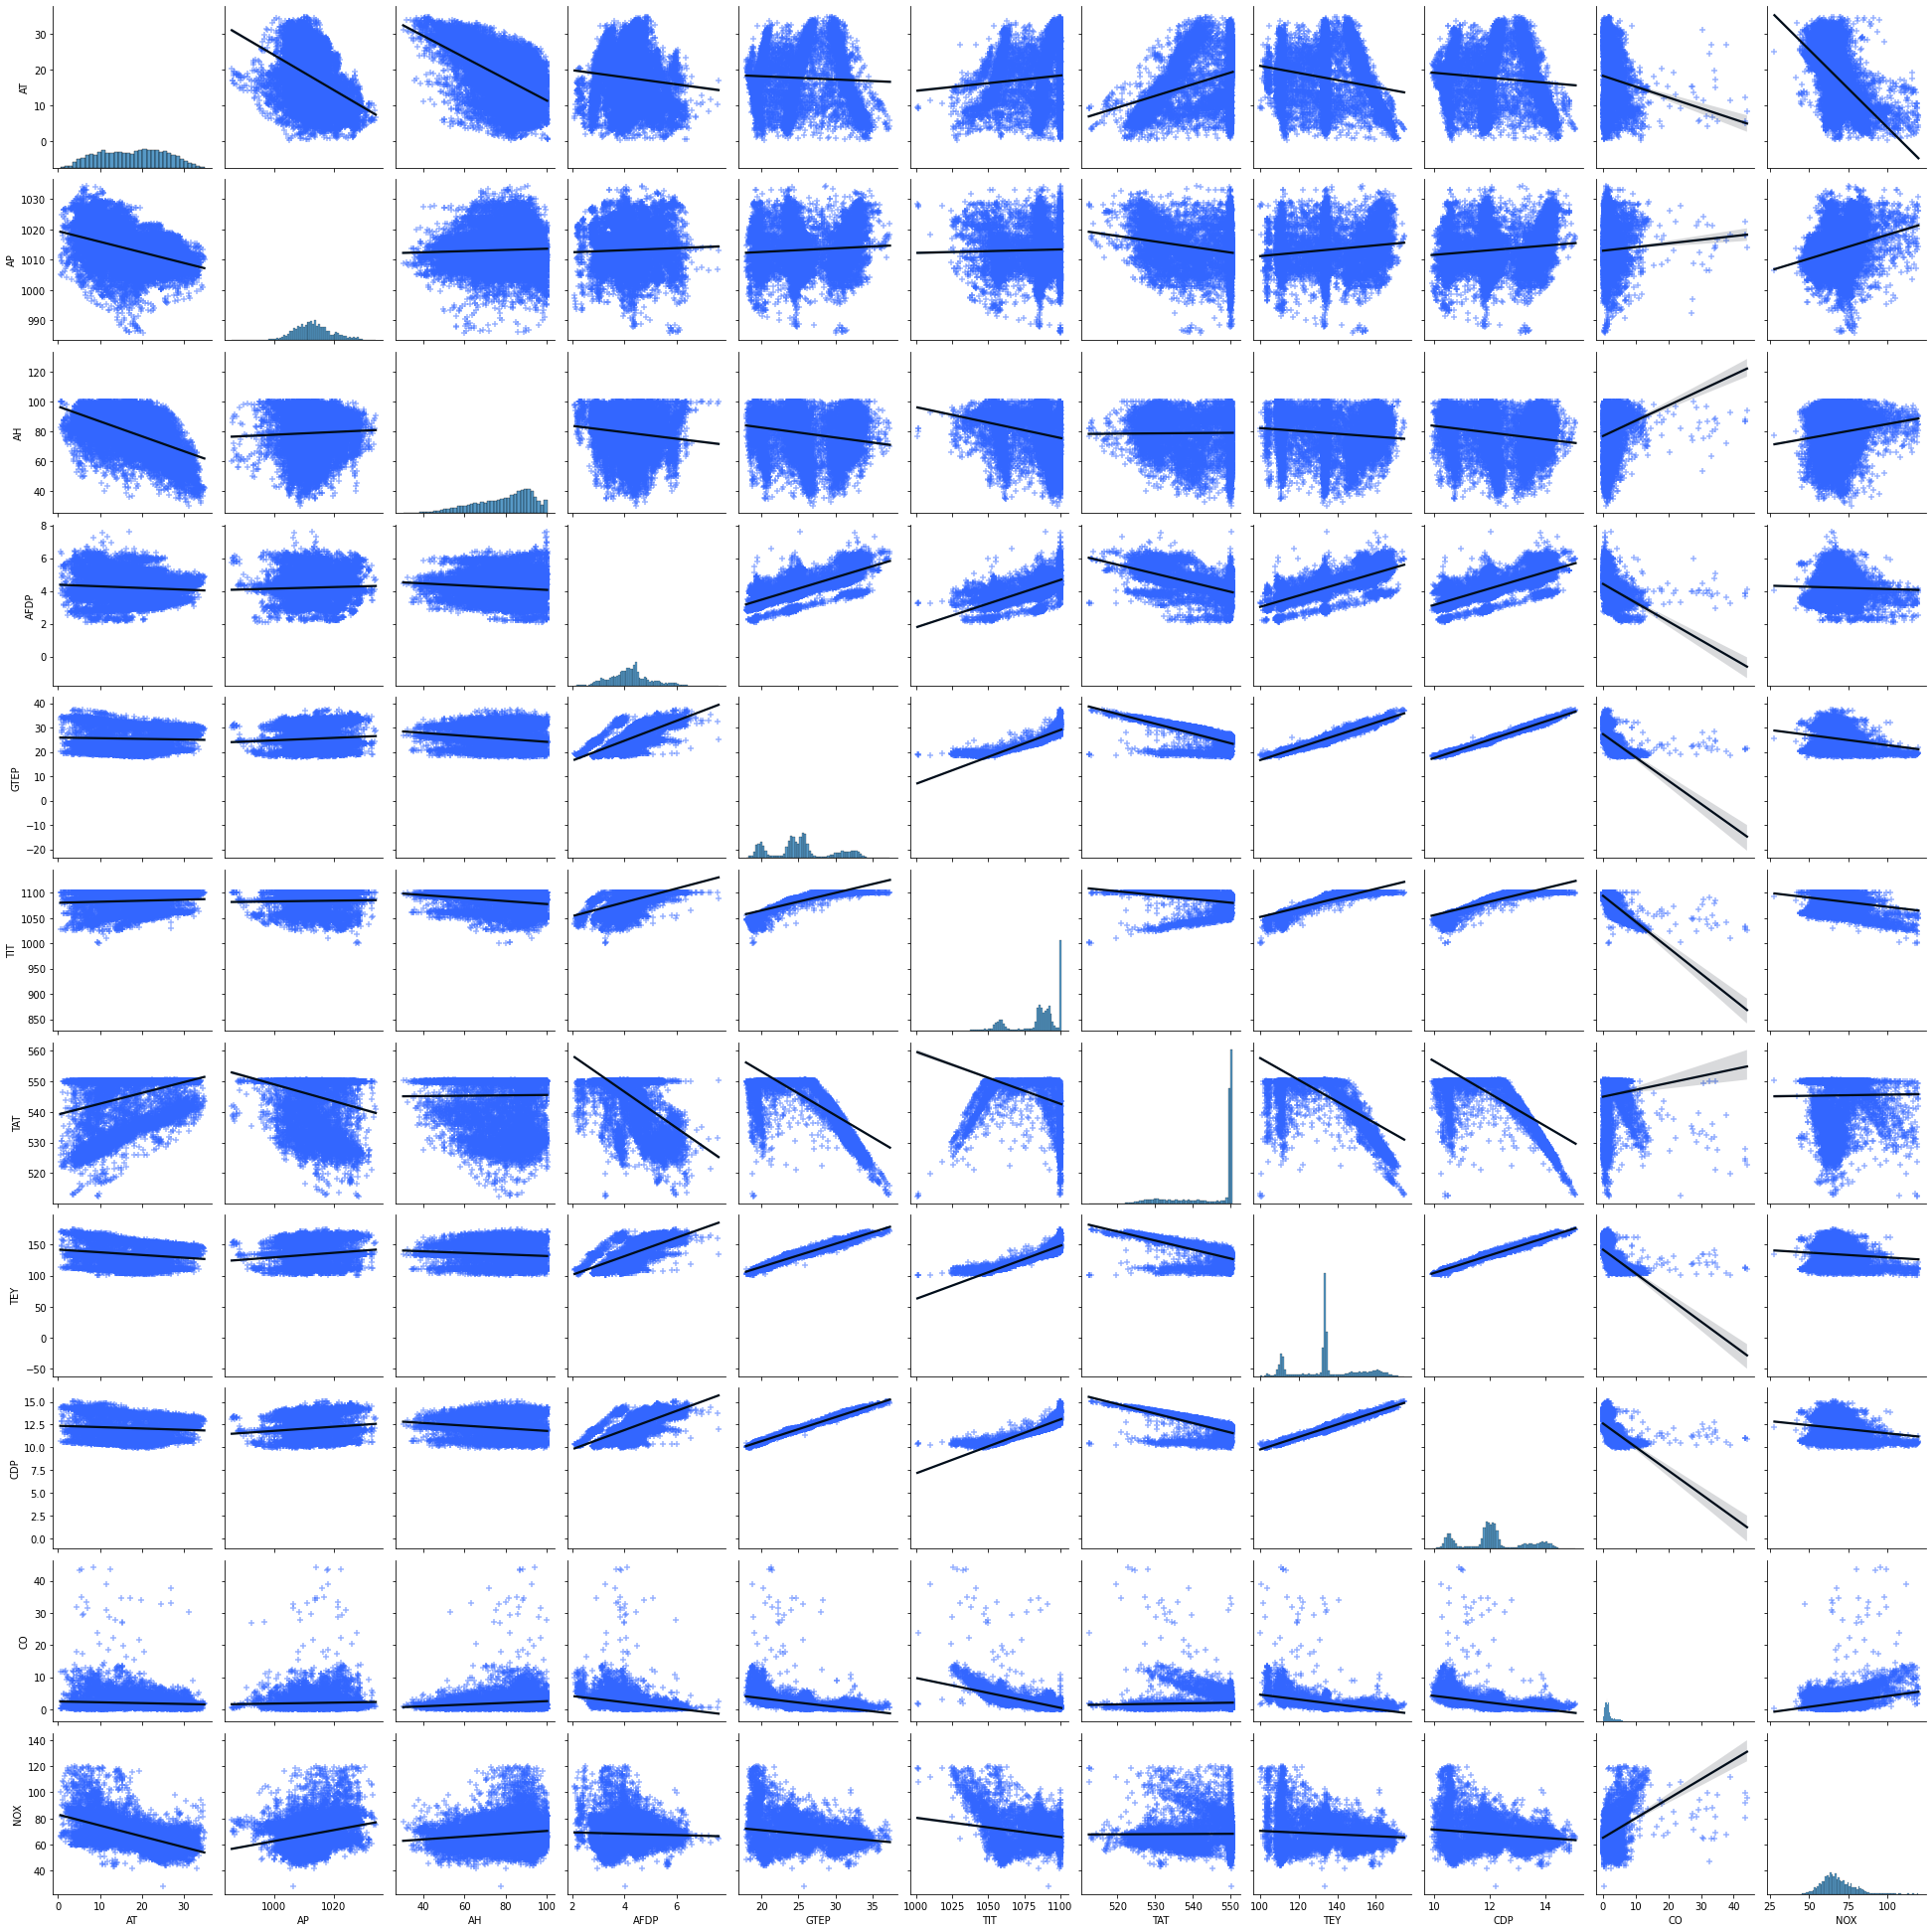

In [90]:
sns.pairplot(gt_data,
                 markers="+",
                 kind='reg',
                 diag_kind="auto",
                 plot_kws={'line_kws':{'color':'#000d1a'},
                           'scatter_kws': {'alpha': 0.5,
                                           'color': '#3366ff'}})


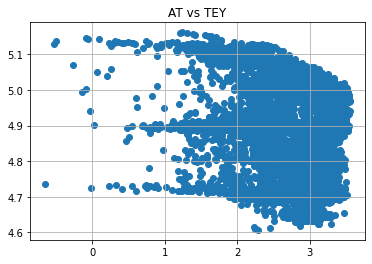

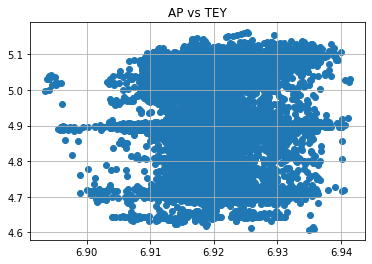

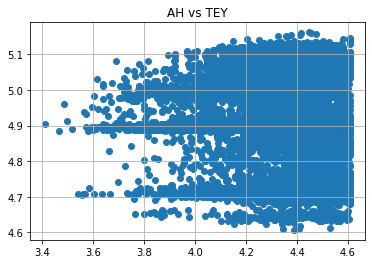

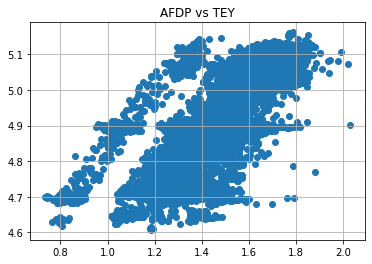

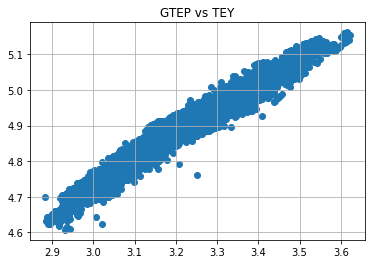

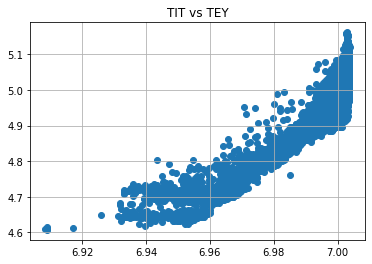

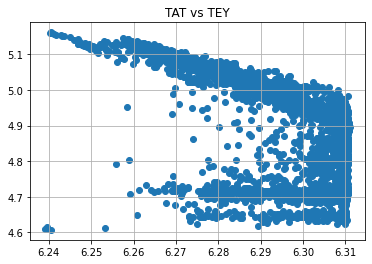

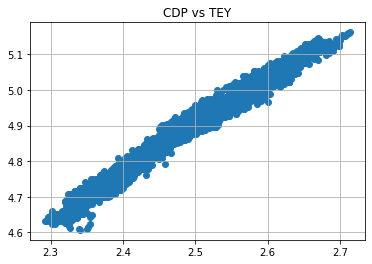

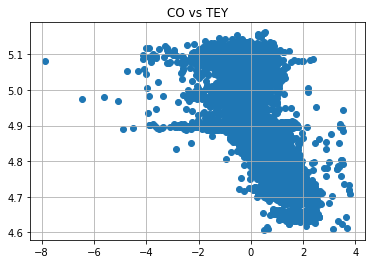

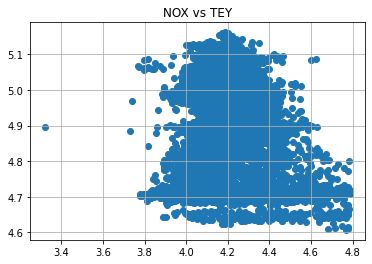

In [91]:
for i in gt_data.columns:
    if i!="TEY": 
        plt.scatter(np.log(gt_data[i]), np.log(gt_data['TEY']))
        plt.title(i+ ' vs TEY')
        plt.grid()
        plt.show()

In [92]:
corr = pd.DataFrame(data = gt_data.corr().iloc[:,7], index=gt_data.columns)
corr = corr.sort_values(by='TEY', ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


##### From correlation matrix as well as heatmap we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.
##### We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.

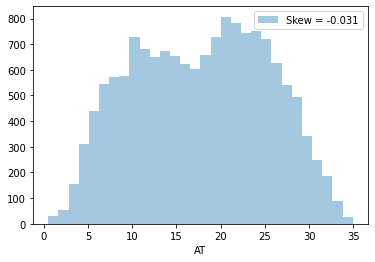

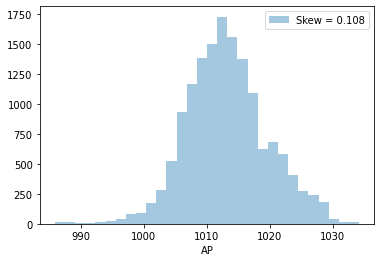

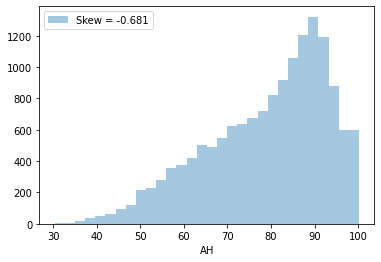

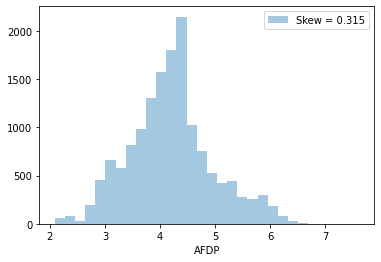

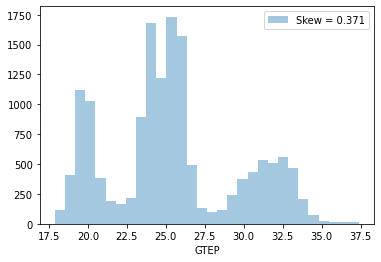

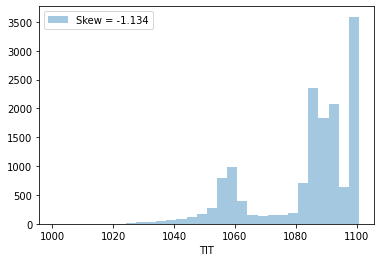

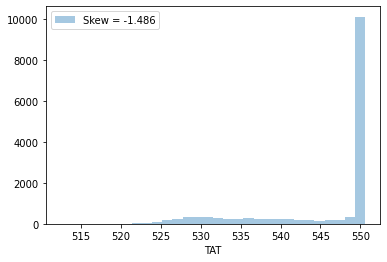

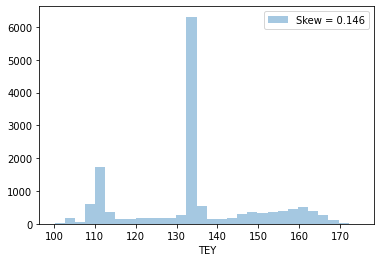

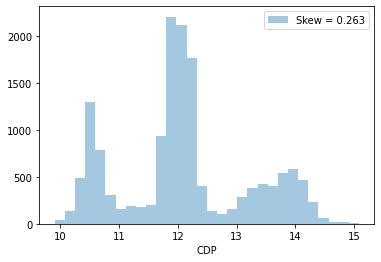

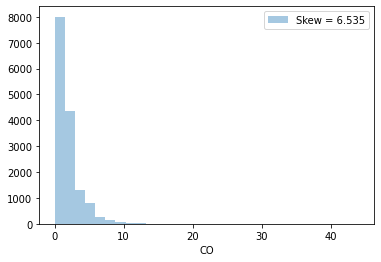

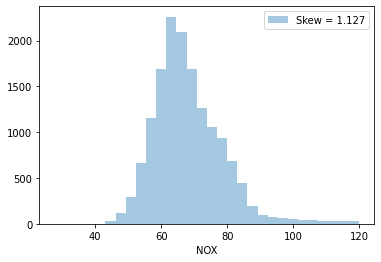

In [93]:
# Histogram for visualization of numeric variables
numerical_features=[feature for feature in gt_data.columns if gt_data[feature].dtypes != 'O']
for feat in numerical_features:
    skew = gt_data[feat].skew()
    sns.distplot(gt_data[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers.

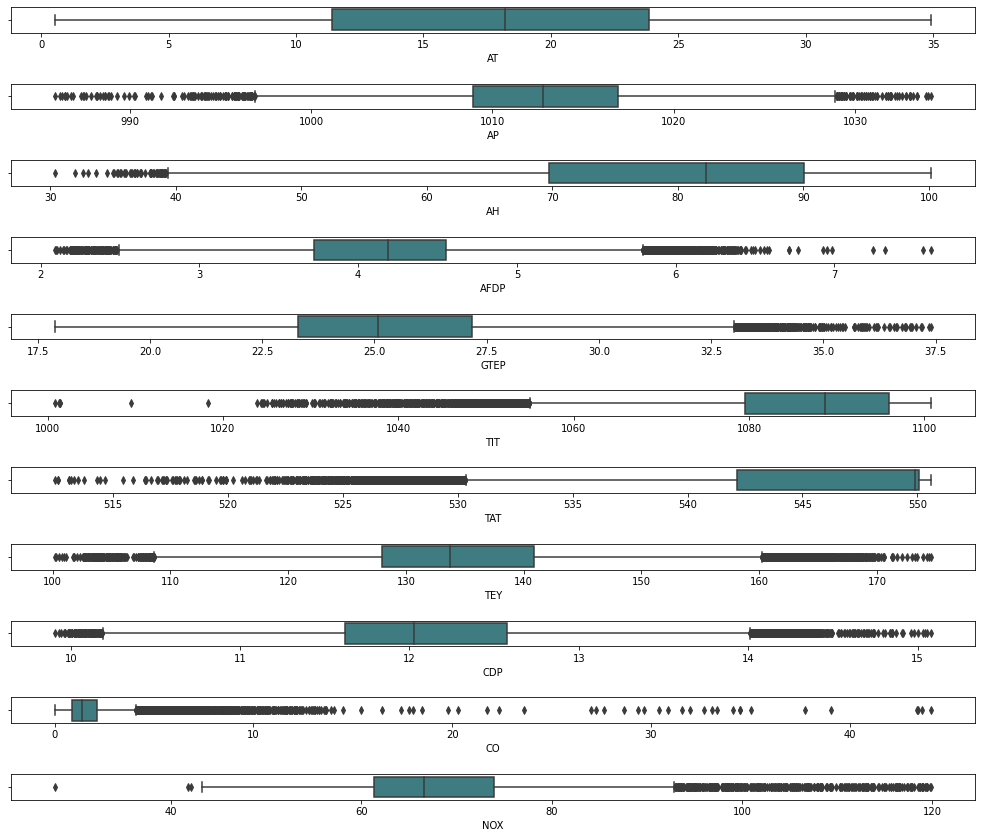

In [94]:
# Implementation of Boxplot for visualization of outlier
fig, axes=plt.subplots(11,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='AT',data=gt_data,palette='crest',ax=axes[0])
sns.boxplot(x='AP',data=gt_data,palette='crest',ax=axes[1])
sns.boxplot(x='AH',data=gt_data,palette='crest',ax=axes[2])
sns.boxplot(x='AFDP',data=gt_data,palette='crest',ax=axes[3])
sns.boxplot(x='GTEP',data=gt_data,palette='crest',ax=axes[4])
sns.boxplot(x='TIT',data=gt_data,palette='crest',ax=axes[5])
sns.boxplot(x='TAT',data=gt_data,palette='crest',ax=axes[6])
sns.boxplot(x='TEY',data=gt_data,palette='crest',ax=axes[7])
sns.boxplot(x='CDP',data=gt_data,palette='crest',ax=axes[8])
sns.boxplot(x='CO',data=gt_data,palette='crest',ax=axes[9])
sns.boxplot(x='NOX',data=gt_data,palette='crest',ax=axes[10])
plt.tight_layout(pad=2.0)

All feature contains outliers except AT so we remove the outlier.

### Data pre-processing

In [95]:
# Removing Outliers
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [96]:
for i in range(5):
    lower,uper=outlierDetect(gt_data[feat])
    gt_data=gt_data[(gt_data[feat]<uper )&(gt_data[feat]>lower)]
    print(gt_data.shape)

(14660, 11)
(14607, 11)
(14595, 11)
(14594, 11)
(14594, 11)


In [97]:
# Droping unwanted features
data=gt_data.copy()
data= data.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)
data.shape

(14594, 7)

In [98]:
x = data.drop('TEY',axis=1)
y = data[['TEY']]

# Standardization of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std


array([[-0.94899387, -1.43463933, -1.69264707,  0.56737832, -1.41234797,
         0.75981469],
       [-0.94925825, -1.41886718, -1.68606173,  0.56737832, -1.41877431,
         0.80539205],
       [-0.97225942, -1.40649211, -1.67947639,  0.55076429, -1.41602016,
         0.78578708],
       ...,
       [-0.67892835, -1.39241849, -1.65972038,  0.5545983 , -1.44447969,
         0.8852083 ],
       [-0.8933416 , -1.55572093, -2.31825416,  0.0830155 , -1.60054803,
         1.52161581],
       [-0.94119462, -1.49505881, -2.54215565, -0.29910715, -1.57025241,
         1.70504237]])

In [99]:
# Train_test Split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((10215, 6), (10215, 1), (4379, 6), (4379, 1))

### KFold Validation

In [100]:
from sklearn.model_selection import KFold,cross_val_score

cv = KFold(n_splits=3, shuffle=True, random_state=None)


### Hyperparameter Tuning: Optimal Number of Layers and Neurons

In [101]:

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras_tuner import RandomSearch
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow import keras
from tensorflow.keras.optimizers import Adam

In [113]:
def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.01)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [120]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
neuron1 =[8,16,32,48]
neuron2 =[8,16,32]
param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)
grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = cv,n_jobs = -1, verbose = 1)
grid_result = grid.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [121]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 2039.8046468098958, using {'neuron1': 16, 'neuron2': 16}
2039.2899983723958,1.468670350253048 with: {'neuron1': 8, 'neuron2': 8}
2039.66064453125,1.2202693687367958 with: {'neuron1': 8, 'neuron2': 16}
2039.2952473958333,1.4641371055347996 with: {'neuron1': 8, 'neuron2': 32}
2039.4514973958333,1.3410457795977728 with: {'neuron1': 16, 'neuron2': 8}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 16, 'neuron2': 16}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 16, 'neuron2': 32}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 32, 'neuron2': 8}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 32, 'neuron2': 16}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 32, 'neuron2': 32}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 48, 'neuron2': 8}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 48, 'neuron2': 16}
2039.8046468098958,1.1737863184458466 with: {'neuron1': 48, 'neuron2': 32}


## Hyperparameter Tuning: Optimal Batch_size, Number of Epochs

In [122]:
def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim=6,activation='relu'))
    model.add(Dense(16,activation='relu'))
    model.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

In [123]:
model = KerasRegressor(build_fn = create_model,verbose = 0)
batch_size = [10,20,40,50]
epochs = [10,50,100,200]
param_grid = dict(batch_size = batch_size,epochs = epochs)
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=cv,n_jobs = -1, verbose = 1)

In [124]:
grid_result = grid.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [126]:
print('Best {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_["mean_test_score"]
stds = grid_result.cv_results_["std_test_score"]
params = grid_result.cv_results_["params"]
for mean,stdev,param in zip(means,stds,params):
    print("{},{} with {}".format(mean,stdev,param))

Best -0.9779219428698221, using {'batch_size': 20, 'epochs': 200}
-1.4582046667734783,0.20387893072044233 with {'batch_size': 10, 'epochs': 10}
-1.2150000929832458,0.1989893021769462 with {'batch_size': 10, 'epochs': 50}
-1.3017224073410034,0.09353862378277025 with {'batch_size': 10, 'epochs': 100}
-1.0072627663612366,0.0460263395860082 with {'batch_size': 10, 'epochs': 200}
-1.4408876101175945,0.11639886570546507 with {'batch_size': 20, 'epochs': 10}
-1.4578428268432617,0.08148736229938773 with {'batch_size': 20, 'epochs': 50}
-1.2609502871831257,0.015554561158077506 with {'batch_size': 20, 'epochs': 100}
-0.9779219428698221,0.05471282532529926 with {'batch_size': 20, 'epochs': 200}
-1.324871023495992,0.13974916110691304 with {'batch_size': 40, 'epochs': 10}
-1.4143495162328084,0.14194273947422423 with {'batch_size': 40, 'epochs': 50}
-1.1870100498199463,0.04262497152547929 with {'batch_size': 40, 'epochs': 100}
-1.4143621524175007,0.17623294242854323 with {'batch_size': 40, 'epochs':

## Hyperparameter Tuning: Optimal Droupout rate and learning_rate

In [125]:
from keras.layers import Dropout
def create_model1(dropout_rate,learning_rate):
    model1 = Sequential()
    model1.add(Dense(16,input_dim=6,activation='relu'))
    model1.add(Dense(16,activation='relu'))
    model1.add(Dense(units=1,activation="linear"))
    
    adam=Adam(learning_rate=learning_rate)
    model1.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model1

In [128]:
model1 =KerasRegressor(build_fn = create_model1,verbose = 0,batch_size =20,epochs =200)
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.1,0.2,0.3,0.4]
param_grids = dict(dropout_rate = dropout_rate,learning_rate = learning_rate)
grid1 = GridSearchCV(estimator=model1,param_grid=param_grids,cv=cv,n_jobs = -1, verbose = 1)
grid_result1 = grid1.fit(x_train,y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [129]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result1.best_score_,grid_result1.best_params_))
means = grid_result1.cv_results_['mean_test_score']
stds = grid_result1.cv_results_['std_test_score']
params = grid_result1.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -0.9224134087562561, using {'dropout_rate': 0.4, 'learning_rate': 0.001}
-0.940736989180247,0.03133739605655418 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
-1.2986046473185222,0.16152826314993712 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
-1.296429951985677,0.18645644215599366 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
-0.957170307636261,0.068164268852059 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
-1.1135146021842957,0.1648816938317002 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
-1.3569440444310505,0.1685568650682351 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}
-0.9255499243736267,0.04929724503076839 with: {'dropout_rate': 0.3, 'learning_rate': 0.001}
-1.1506503621737163,0.1822204972043688 with: {'dropout_rate': 0.3, 'learning_rate': 0.01}
-1.353971044222514,0.12868474928644208 with: {'dropout_rate': 0.3, 'learning_rate': 0.1}
-0.9224134087562561,0.053816440531814023 with: {'dropout_rate': 0.4, 'learning_rate': 0.001}
-1.45640250047047

## Hyperparameter Tuning: Optimal Activation Function and Kernel Initializer

In [130]:

def create_model2(activation_function,init):
    model = Sequential()
    model.add(Dense(16,input_dim=6,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.4))
    model.add(Dense(16,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.4))
    model.add(Dense(units=1,activation="linear"))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mean_absolute_error',optimizer = adam,metrics=["mean_absolute_error"])
    return model

In [131]:
model2=KerasRegressor(build_fn=create_model2,batch_size=20,epochs=200,verbose=0)
activation_function=['softmax','tanh','relu']
init=['normal','uniform','zero']
param_grid=dict(activation_function=activation_function,init=init)
grid2 = GridSearchCV(estimator=model2,param_grid=param_grid,cv=cv,n_jobs = -1, verbose = 1)
grid_result2 = grid2.fit(x_train,y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [132]:
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means = grid_result2.cv_results_['mean_test_score']
stds = grid_result2.cv_results_['std_test_score']
params = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : -3.8671696980794272, using {'activation_function': 'tanh', 'init': 'uniform'}
-27.4290345509847,1.4764418098849568 with: {'activation_function': 'softmax', 'init': 'normal'}
-28.342520395914715,0.26236334404202916 with: {'activation_function': 'softmax', 'init': 'uniform'}
-28.340198516845703,0.2528923903654777 with: {'activation_function': 'softmax', 'init': 'zero'}
-4.104935805002849,0.18310676522842487 with: {'activation_function': 'tanh', 'init': 'normal'}
-3.8671696980794272,0.5305423707264381 with: {'activation_function': 'tanh', 'init': 'uniform'}
-12.43211841583252,0.1384673959938152 with: {'activation_function': 'tanh', 'init': 'zero'}
-5.4794464111328125,0.7082944902740691 with: {'activation_function': 'relu', 'init': 'normal'}
-5.6000776290893555,0.3719593442494508 with: {'activation_function': 'relu', 'init': 'uniform'}
-66.59020233154297,0.26136566708498865 with: {'activation_function': 'relu', 'init': 'zero'}


## Model Bulding Using Best Parameters

In [133]:
#assigning predictor variables to x and response variable to y
x = data.drop('TEY', axis=1)
y = data[["TEY"]]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)
scaler_train = StandardScaler()
scaler_test = StandardScaler()

x_train_std = scaler_train.fit_transform(x_train)
x_test_std  = scaler_test.fit_transform(x_test) 

x_train_std.shape,x_test_std.shape,y_train.shape,y_test.shape

((10215, 6), (4379, 6), (10215, 1), (4379, 1))

In [137]:
final_model = Sequential()
final_model.add( Dense( units = 16 , activation = 'tanh' , kernel_initializer = 'uniform', input_dim = 6))
final_model.add(Dropout(0.4))
final_model.add( Dense( units = 16 , activation = 'tanh' , kernel_initializer = 'uniform' )) 
final_model.add(Dropout(0.4))
final_model.add( Dense( units = 1  , kernel_initializer = 'uniform' ))
adam=Adam(lr=0.001)
final_model.compile(loss="mse",optimizer = adam,metrics=["mae", "mse"])
history = final_model.fit(x_train_std,y_train,validation_split=0.3, batch_size =20 , epochs =200)

Epoch 1/200
358/358 [==============================] - 2s 3ms/step - loss: 17373.5117 - mae: 130.8774 - mse: 17373.5117 - val_loss: 15919.7686 - val_mae: 125.2097 - val_mse: 15919.7686
Epoch 2/200
358/358 [==============================] - 1s 2ms/step - loss: 15177.9121 - mae: 122.1838 - mse: 15177.9121 - val_loss: 14247.5303 - val_mae: 118.3407 - val_mse: 14247.5303
Epoch 3/200
358/358 [==============================] - 1s 2ms/step - loss: 13665.0195 - mae: 115.7956 - mse: 13665.0195 - val_loss: 12841.1885 - val_mae: 112.2414 - val_mse: 12841.1885
Epoch 4/200
358/358 [==============================] - 1s 2ms/step - loss: 12314.9453 - mae: 109.7729 - mse: 12314.9453 - val_loss: 11571.2002 - val_mae: 106.4337 - val_mse: 11571.2002
Epoch 5/200
358/358 [==============================] - 1s 3ms/step - loss: 11133.2031 - mae: 104.2046 - mse: 11133.2031 - val_loss: 10409.9883 - val_mae: 100.8311 - val_mse: 10409.9883
Epoch 6/200
358/358 [==============================] - 1s 2ms/step - loss: 

### Model Evaluation Train and Test Error

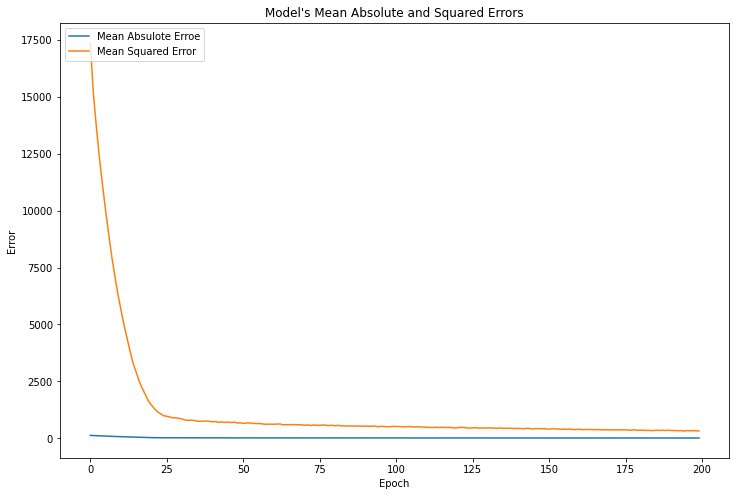

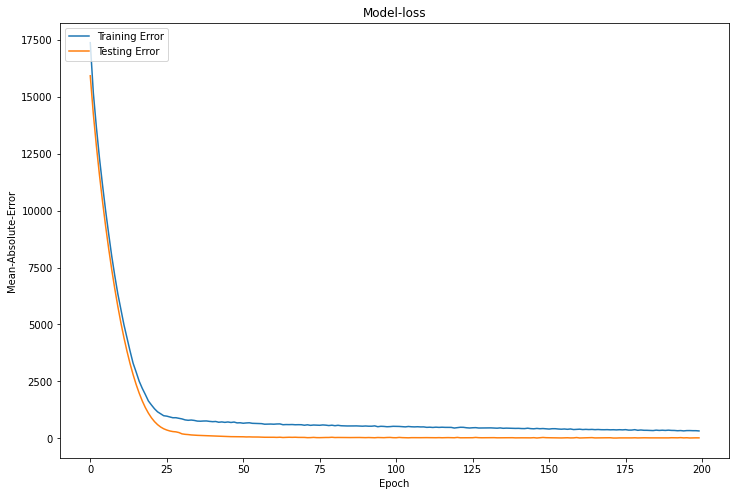

In [138]:
# summarize history for Model's Mean Absolute and Squared Errors
plt.figure(figsize=(12,8))
plt.plot(final_model.history.history[ 'mae'])
plt.plot(final_model.history.history['mse'])
plt.title("Model's Mean Absolute and Squared Errors")
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.legend(['Mean Absulote Erroe', 'Mean Squared Error'],loc = 'upper left')
plt.show()
#summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(final_model.history.history['loss'])
plt.plot(final_model.history.history['val_loss'])
plt.title('Model-loss')
plt.xlabel('Epoch')
plt.ylabel('Mean-Absolute-Error')
plt.legend(['Training Error', 'Testing Error'],loc='upper left')
plt.show()

### Predicting values from Model using same dataset

In [139]:
# generating predictions for test data
predict_test = final_model.predict(x_test_std) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = predict_test
print(predictions_df.shape)
predictions_df.head(10)

(4379, 8)


,AFDP,GTEP,TIT,TAT,CDP,CO,Actual,Predicted
10089,4.5134,31.198,1100.0,535.40,13.554,1.85090,154.42,150.399994
3682,4.1234,26.092,1092.4,550.17,12.208,1.05140,133.83,130.220764
9342,4.4829,24.005,1085.4,550.02,11.984,1.20200,134.30,129.726532
10708,3.6043,25.037,1088.6,549.71,12.170,0.77815,133.50,130.548996
11309,3.7388,25.203,1090.7,549.74,12.152,0.45534,135.03,132.115723
6227,4.3018,24.115,1082.5,550.18,11.745,1.24750,126.56,125.285233
11078,3.6406,24.044,1082.0,550.22,11.720,1.26530,128.11,124.387070
1138,3.9182,19.719,1053.2,547.22,10.547,2.86620,111.73,110.075897
13783,4.8938,31.438,1100.2,529.39,14.003,1.11390,158.12,157.673630
3678,3.8393,23.387,1076.2,549.99,11.384,2.51520,120.65,119.082642


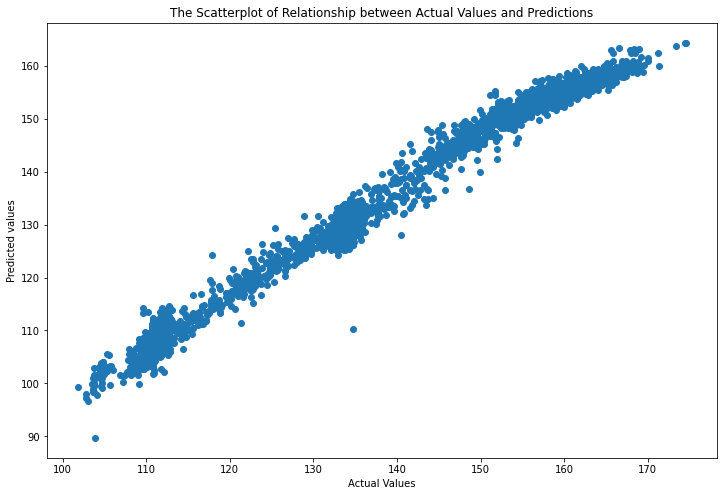

In [140]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])

In [141]:
# We will evaluate our model performance by calculating the residual sum of squares and the explained variance score
from sklearn import metrics
print("MAE:",metrics.mean_absolute_error(y_test,predict_test))
print ("MSE:",metrics.mean_squared_error(y_test,predict_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test,predict_test)))

MAE: 3.9061000734596227
MSE: 18.8237286659303
RMSE: 4.338632119220331


In [142]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
predict_test = final_model.predict(x_test_std)
predict_train = final_model.predict(x_train_std) 
print('R2_score (train): ',r2_score(y_train, predict_train))
print('R2_score (test): ',r2_score(y_test, predict_test))

R2_score (train):  0.9263037393997784
R2_score (test):  0.9239979163226936


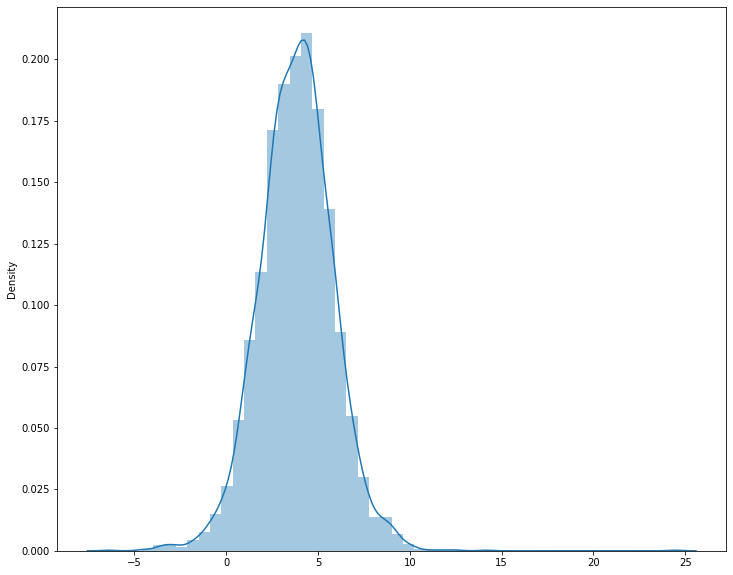

In [143]:
plt.figure(figsize=(12,10))
sns.distplot(y_test-predict_test,bins=50) 

## Conclusion
+ From correlation matrix as well as heatmap we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.
+ Some of the features are normally distributed. The features AH, CO, TITy and TATa exhibit the highest skew coefficients. Moreover, the distribution of Carbon Mono oxide (CO) and Turbine inlet temperature (TIT) and Turbine after temperature (TAT) seem to contain many outliers.
+ when we tune hyperparameters for model bulding it gives
+ learning_rate=0.001
+ batch_size=20
+ epochs=200
+ drop out rate=0.4
+ activation function = tanh
+ kernal initilazer=uniform
+ Our model predict turbine energy yield (TEY) correctly with 92.39 %.